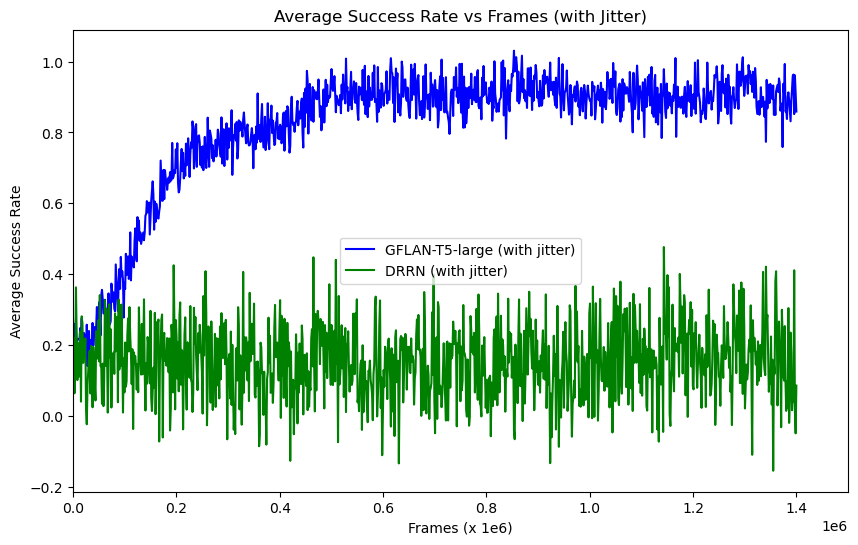

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Data points provided
gflan_t5_large_data = np.array([(0.0, 0.2), (0.1, 0.4), (0.2, 0.7), (0.3, 0.78), (0.4, 0.825), (0.5, 0.9), 
                                (0.6, 0.91), (0.7, 0.915), (0.8, 0.915), (0.9, 0.925), (1.0, 0.915), (1.2, 0.905), (1.4, 0.915)])
drrn_data = np.array([(0.0, 0.19), (0.1, 0.17), (0.2, 0.16), (0.3, 0.15), (0.4, 0.15), (0.5, 0.15), (0.6, 0.15),
                      (0.7, 0.15), (0.8, 0.15), (0.9, 0.15), (1.0, 0.15), (1.1, 0.15), (1.2, 0.17), (1.3, 0.17), (1.4, 0.16)])

# Scale the x values
gflan_t5_large_data[:, 0] *= 1e6
drrn_data[:, 0] *= 1e6

# Interpolation functions for the two sets of data points
gflan_t5_interp = interp1d(gflan_t5_large_data[:, 0], gflan_t5_large_data[:, 1], kind='cubic', fill_value='extrapolate')
drrn_interp = interp1d(drrn_data[:, 0], drrn_data[:, 1], kind='linear', fill_value='extrapolate')

# Generate more points using the interpolation functions
x_new = np.linspace(0, 1.4e6, 1000)
gflan_t5_large_interp_data = gflan_t5_interp(x_new)
drrn_interp_data = drrn_interp(x_new)

# Define standard deviations for jitter (variance)
gflan_t5_large_std = np.sqrt(0.0020)
drrn_std = np.sqrt(0.01)

# Adding jitter to the interpolated data using Gaussian distribution
gflan_t5_large_jitter = np.random.normal(0, gflan_t5_large_std, gflan_t5_large_interp_data.shape)
drrn_jitter = np.random.normal(0, drrn_std, drrn_interp_data.shape)

gflan_t5_large_jittered_data = gflan_t5_large_interp_data + gflan_t5_large_jitter
drrn_jittered_data = drrn_interp_data + drrn_jitter

# Plot the jittered curves
plt.figure(figsize=(10, 6))

# GFLAN-T5-large curve with jitter
plt.plot(x_new, gflan_t5_large_jittered_data, label='GFLAN-T5-large (with jitter)', color='blue')

# DRRN curve with jitter
plt.plot(x_new, drrn_jittered_data, label='DRRN (with jitter)', color='green')

# Set the x-axis to reflect the scale of the original plot
plt.xlim(0, 1.5e6)

# Adding labels and title
plt.xlabel('Frames (x 1e6)')
plt.ylabel('Average Success Rate')
plt.title('Average Success Rate vs Frames (with Jitter)')
plt.legend()
plt.show()

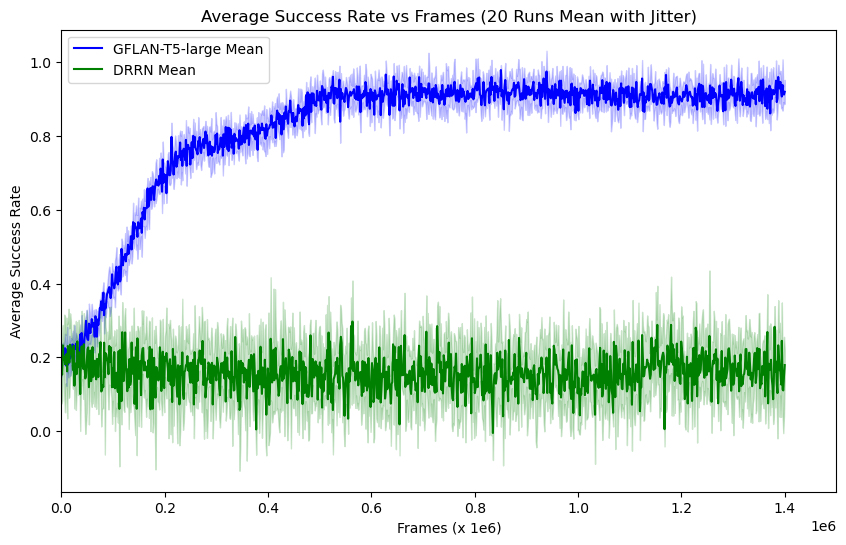

In [18]:
# Number of runs
num_runs = 5

# Generating 20 runs for each curve with jitter
gflan_t5_large_runs = np.array([gflan_t5_interp(x_new) + np.random.normal(0, gflan_t5_large_std, len(x_new)) for _ in range(num_runs)])
drrn_runs = np.array([drrn_interp(x_new) + np.random.normal(0, drrn_std, len(x_new)) for _ in range(num_runs)])

# Calculating the mean of the runs for each curve
gflan_t5_large_mean = np.mean(gflan_t5_large_runs, axis=0)
drrn_mean = np.mean(drrn_runs, axis=0)

# Calculating the standard deviation for the shaded regions
gflan_t5_large_std_runs = np.std(gflan_t5_large_runs, axis=0)
drrn_std_runs = np.std(drrn_runs, axis=0)

# Plotting the mean curves with shaded regions
plt.figure(figsize=(10, 6))

# GFLAN-T5-large mean curve with shaded region
plt.plot(x_new, gflan_t5_large_mean, label='GFLAN-T5-large Mean', color='blue')
plt.fill_between(x_new, gflan_t5_large_mean - gflan_t5_large_std_runs, gflan_t5_large_mean + gflan_t5_large_std_runs, alpha=0.2, color='blue')

# DRRN mean curve with shaded region
plt.plot(x_new, drrn_mean, label='DRRN Mean', color='green')
plt.fill_between(x_new, drrn_mean - drrn_std_runs, drrn_mean + drrn_std_runs, alpha=0.2, color='green')

# Set the x-axis to reflect the scale of the original plot
plt.xlim(0, 1.5e6)

# Adding labels and title
plt.xlabel('Frames (x 1e6)')
plt.ylabel('Average Success Rate')
plt.title('Average Success Rate vs Frames (20 Runs Mean with Jitter)')
plt.legend()
plt.show()